In [13]:
#Load the Drive helper & Mount
from google.colab import drive

# This will Prompt for Authorizationā
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# 1. Install gdown to download from Google Drive
!pip install -q gdown

# 2. Use gdown to download the ZIP file using the FILE ID from your Google Drive link
file_id = '1QDibQJ5UN300YooVoSjdfQjV1utgNTpd'  # Replace with your actual file ID
!gdown --id {file_id} --output dataset.zip

# 3. Unzip the file
import zipfile
import os

with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Extract to 'dataset' folder

# 4. Check extracted files
os.listdir("dataset")


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1QDibQJ5UN300YooVoSjdfQjV1utgNTpd
From (redirected): https://drive.google.com/uc?id=1QDibQJ5UN300YooVoSjdfQjV1utgNTpd&confirm=t&uuid=a893d397-a02c-4215-86ee-e560b88b7e91
To: /content/dataset.zip
100% 2.90G/2.90G [00:24<00:00, 118MB/s]


['new plant diseases dataset(augmented)',
 'test',
 'New Plant Diseases Dataset(Augmented)']

In [5]:
#Importing Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img    #instead of keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical



In [ ]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Convert image to numpy array
def convertImageToArray(image_path, img_size=(64, 64)):
    try:
        img = Image.open(image_path).convert('RGB')
        img = img.resize(img_size)
        return np.array(img)
    except:
        return None  # Skip unreadable images

# Set dataset path
train_dir = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"

# List all class folders
class_names = sorted(os.listdir(train_dir))
label_map = {name: idx for idx, name in enumerate(class_names)}

# Init lists
image_list = []
label_list = []

# Loop through each class
for class_name in tqdm(class_names, desc="Processing"):
    class_path = os.path.join(train_dir, class_name)
    image_files = os.listdir(class_path)

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        img_array = convertImageToArray(img_path)
        if img_array is not None:
            image_list.append(img_array)
            label_list.append(label_map[class_name])

# Convert to numpy arrays
X = np.array(image_list)
y = np.array(label_list)

print(f"Total images: {X.shape[0]}")
print(f"Image shape: {X.shape[1:]}")
print(f"Total classes: {len(class_names)}")


Processing: 100%|██████████| 38/38 [02:02<00:00,  3.23s/it]


Total images: 70295
Image shape: (64, 64, 3)
Total classes: 38


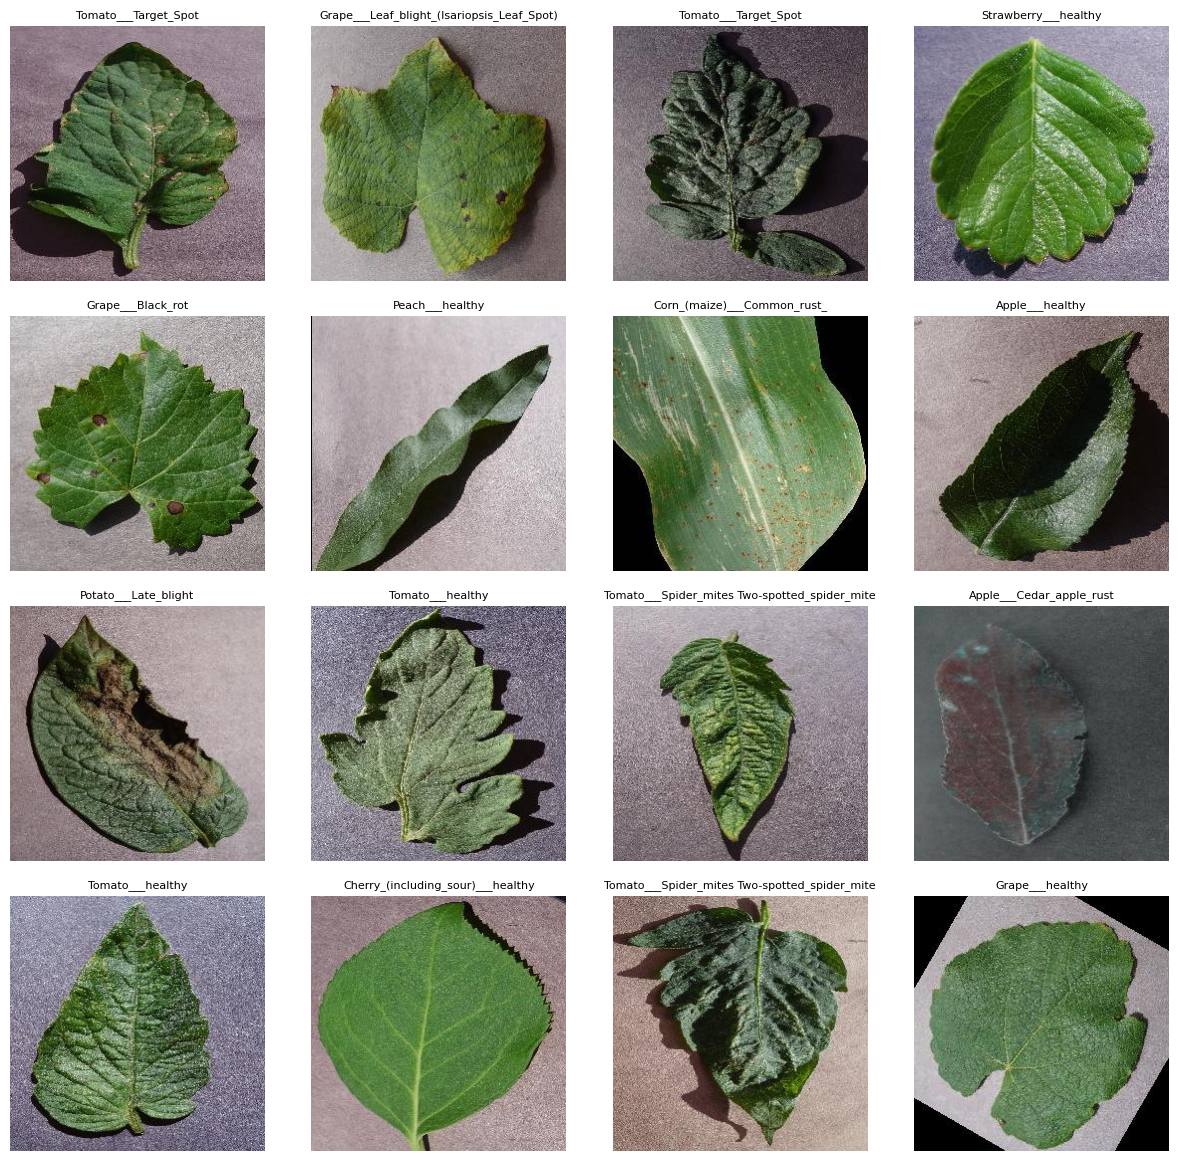

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os, random

# Correct path to the 'train' folder
train_path = "/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
class_folders = sorted(os.listdir(train_path))

plt.figure(figsize=(12,12))

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()

    # Choose a random class folder
    class_name = random.choice(class_folders)
    class_path = os.path.join(train_path, class_name)

    # Pick a random image from that class
    img_name = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)

    # Read and plot
    img = imread(img_path)
    plt.imshow(img)
    plt.title(class_name, fontsize=8)
    plt.axis('off')

plt.show()


In [ ]:
#Visualize The Number of Classes Count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
24,2022
0,2016
15,2010
3,2008
19,1988


In [ ]:
#Check the Shape of the First Image

image_list[0].shape

(64, 64, 3)

In [ ]:
label_list = np.array(label_list)
label_list.shape

(70295,)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    '/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    '/content/dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(64, 64),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


Found 56251 images belonging to 38 classes.
Found 3503 images belonging to 38 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding = "same", input_shape = (64, 64, 3), activation = "relu"))


model.add(MaxPooling2D(pool_size = (3,3)))

model.add(Conv2D(64, (3,3),
                 padding = "same",
                 activation = "relu"))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(38, activation = "softmax"))   #Provides the Probability of Each Class
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 21, 21, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       409,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,526 (1.65 MB)

 Trainable params: 431,526 (1.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(0.0001),
              metrics = ['accuracy'])

In [ ]:
epochs = 10
batch_size = 8
history = model.fit(train_generator, validation_data=val_generator,
                    batch_size = batch_size,
                    epochs = epochs,
)


Epoch 1/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 301s 43ms/step - accuracy: 0.9031 - loss: 0.3095 - val_accuracy: 0.8630 - val_loss: 0.4264
Epoch 2/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 298s 42ms/step - accuracy: 0.9094 - loss: 0.2900 - val_accuracy: 0.8713 - val_loss: 0.3997
Epoch 3/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 295s 42ms/step - accuracy: 0.9196 - loss: 0.2544 - val_accuracy: 0.8633 - val_loss: 0.4123
Epoch 4/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 325s 42ms/step - accuracy: 0.9249 - loss: 0.2406 - val_accuracy: 0.8738 - val_loss: 0.3830
Epoch 5/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 296s 42ms/step - accuracy: 0.9316 - loss: 0.2175 - val_accuracy: 0.8761 - val_loss: 0.4030
Epoch 6/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 323s 42ms/step - accuracy: 0.9365 - loss: 0.2000 - val_accuracy: 0.8744 - val_loss: 0.3746
Epoch 7/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 295s 42ms/step - accuracy: 0.9441 - loss: 0.1802 - val_accuracy: 0.8838 - val_loss: 0.3718
Epoch 8/10
7032/7032 ━━━━━━━━━━━━━━━━━━━━ 328s 43ms/step - accuracy: 

In [ ]:
model.save("plant_disease.h5")

#Serialize Model to JSON
json_model = model.to_json()

#Save the Model Architecture to JSON File
with open('plant_model.json', 'w') as json_file:
  json_file.write(json_model)

#Saving the Weights of the Model
model.save_weights("plant_model.weights.h5")

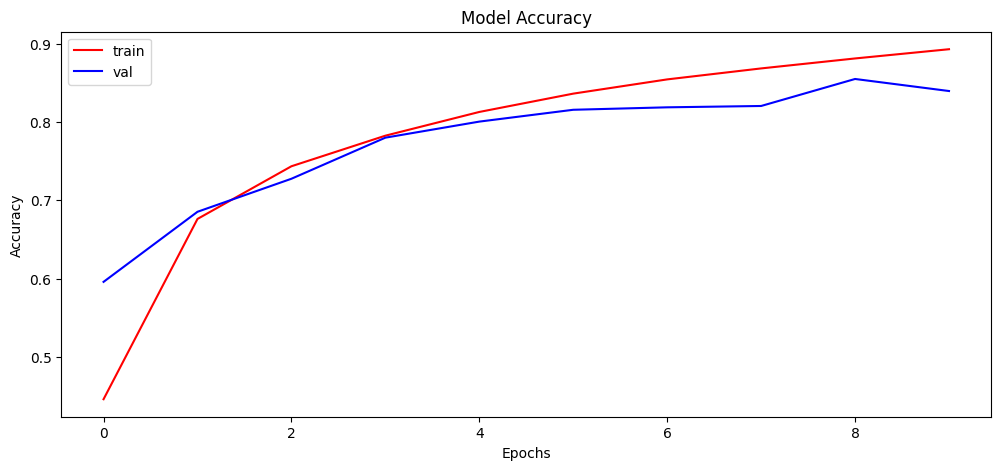

In [ ]:
#Plot the training History

plt.figure(figsize = (12,5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()


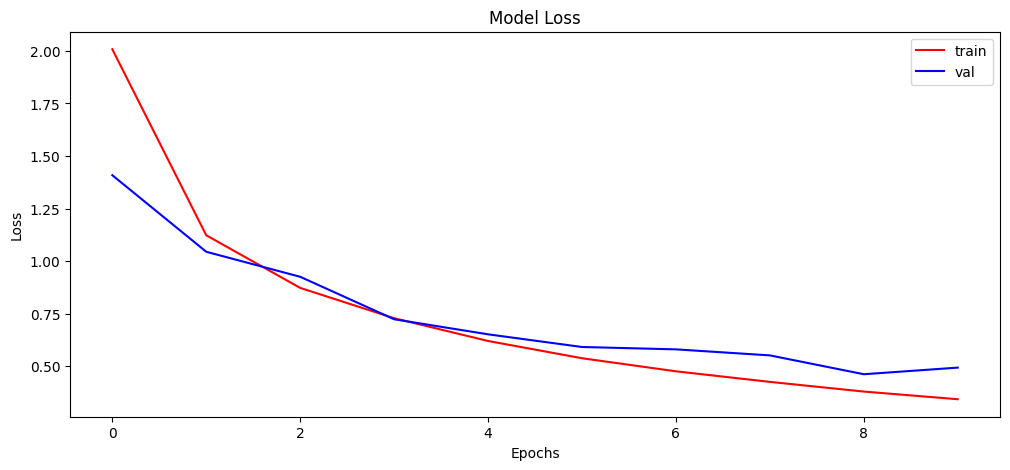

In [ ]:
#Plot the training History

plt.figure(figsize = (12,5))
plt.plot(history.history['loss'], color = 'r')
plt.plot(history.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
print("[INFO] Calcuating Model Accuracy")
scores = model.evaluate(val_generator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calcuating Model Accuracy
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8867 - loss: 0.3871
Test Accuracy: 88.26720118522644


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
🖼️ Random Test Image: TomatoYellowCurlVirus1.JPG
🤖 Predicted Disease Name: Tomato___Tomato_Yellow_Leaf_Curl_Virus


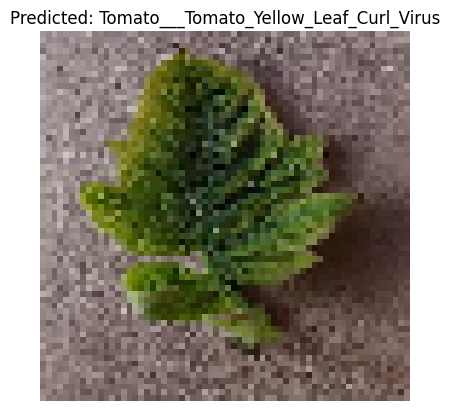

In [ ]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Path to your test folder
test_folder = "/content/dataset/test/test"

# List all image files in the test folder
image_files = [f for f in os.listdir(test_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Pick a random image
random_img_name = random.choice(image_files)
random_img_path = os.path.join(test_folder, random_img_name)

# Load and preprocess the image
img = load_img(random_img_path, target_size=(64, 64))
img_array = img_to_array(img) / 255.0
img_batch = np.expand_dims(img_array, axis=0)

# Predict using the trained model
prediction = model.predict(img_batch)
predicted_index = np.argmax(prediction[0])

# Convert index to class label
index_to_label = {v: k for k, v in label_map.items()}
predicted_label = index_to_label[predicted_index]

# Display result
print(f"🖼️ Random Test Image: {random_img_name}")
print(f"🤖 Predicted Disease Name: {predicted_label}")

# Show image with predicted label
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
🖼️ Image: AppleCedarRust1.JPG
🤖 Predicted Disease Name: Apple___Cedar_apple_rust



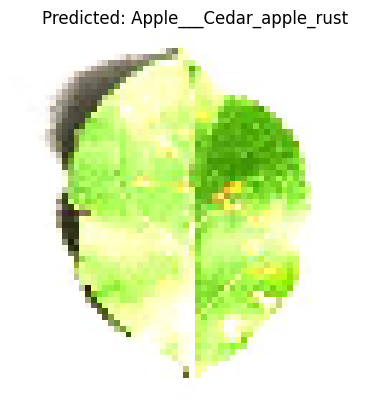

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
🖼️ Image: AppleScab1.JPG
🤖 Predicted Disease Name: Apple___Apple_scab



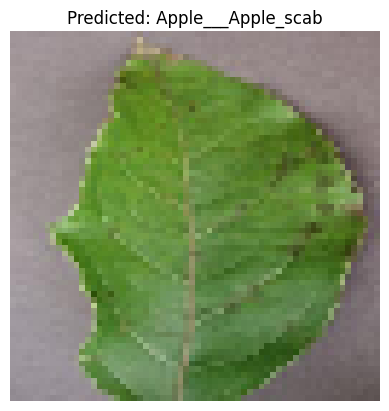

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
🖼️ Image: CornCommonRust2.JPG
🤖 Predicted Disease Name: Corn_(maize)___Common_rust_



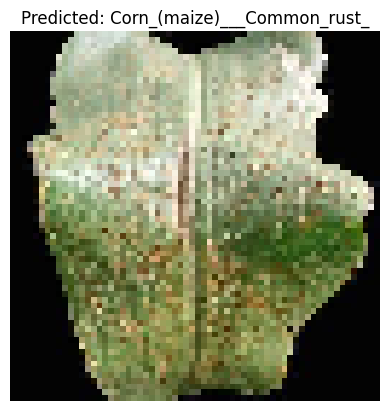

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
🖼️ Image: TomatoEarlyBlight5.JPG
🤖 Predicted Disease Name: Tomato___Early_blight



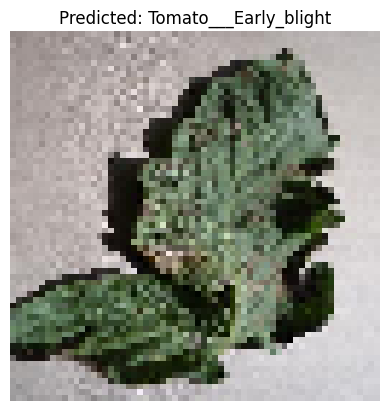

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
🖼️ Image: TomatoYellowCurlVirus3.JPG
🤖 Predicted Disease Name: Tomato___Early_blight



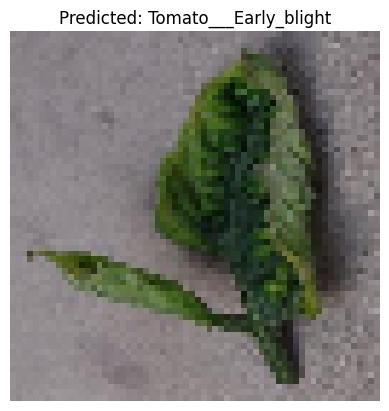

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Create reverse label map
index_to_label = {v: k for k, v in label_map.items()}

# List of 5 image paths (update these)
image_paths = [
    "/content/dataset/test/test/AppleCedarRust1.JPG",
    "/content/dataset/test/test/AppleScab1.JPG",
    "/content/dataset/test/test/CornCommonRust2.JPG",
    "/content/dataset/test/test/TomatoEarlyBlight5.JPG",
    "/content/dataset/test/test/TomatoYellowCurlVirus3.JPG"
]

# Predict and display each
for img_path in image_paths:
    # Load and preprocess
    img = load_img(img_path, target_size=(64, 64))
    img_array = img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_batch)
    predicted_index = np.argmax(prediction[0])
    predicted_label = index_to_label[predicted_index]

    # Display
    print(f"🖼️ Image: {os.path.basename(img_path)}")
    print(f"🤖 Predicted Disease Name: {predicted_label}\n")

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:
print(sorted(label_to_index.keys()))

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, jaccard_score, average_precision_score, mean_squared_error
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Step 1: Get true and predicted labels from val_generator
val_generator.reset()
y_true = []
y_pred = []
y_pred_probs = []

for i in range(len(val_generator)):
    x_batch, y_batch = val_generator[i]
    preds = model.predict(x_batch)

    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))
    y_pred_probs.extend(preds)

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_probs = np.array(y_pred_probs)

# Step 2: Generate label map
index_to_label = {v: k for k, v in label_map.items()}
class_labels = [index_to_label[i] for i in range(len(index_to_label))]

# Step 3: Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
recall = recall_score(y_true, y_pred, average='macro', zero_division=1)
iou = jaccard_score(y_true, y_pred, average='macro')
mse = mean_squared_error(np.eye(len(class_labels))[y_true], y_pred_probs)
map_score = average_precision_score(np.eye(len(class_labels))[y_true], y_pred_probs, average='macro')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

In [18]:
# Step 4: Display metrics
print("📊 Evaluation Metrics from val_generator:")
print(f"✅ Accuracy       : {accuracy:.4f}")
print(f"✅ Precision      : {precision:.4f}")
print(f"✅ Recall         : {recall:.4f}")
print(f"📊 Mean IoU       : {iou:.4f}")
print(f"📉 Mean MSE       : {mse:.6f}")
print(f"🏅 Mean AP (mAP)  : {map_score:.4f}")




📊 Evaluation Metrics from val_generator:
✅ Accuracy       : 0.8827
✅ Precision      : 0.8913
✅ Recall         : 0.8834
📊 Mean IoU       : 0.7984
📉 Mean MSE       : 0.004643
🏅 Mean AP (mAP)  : 0.9510


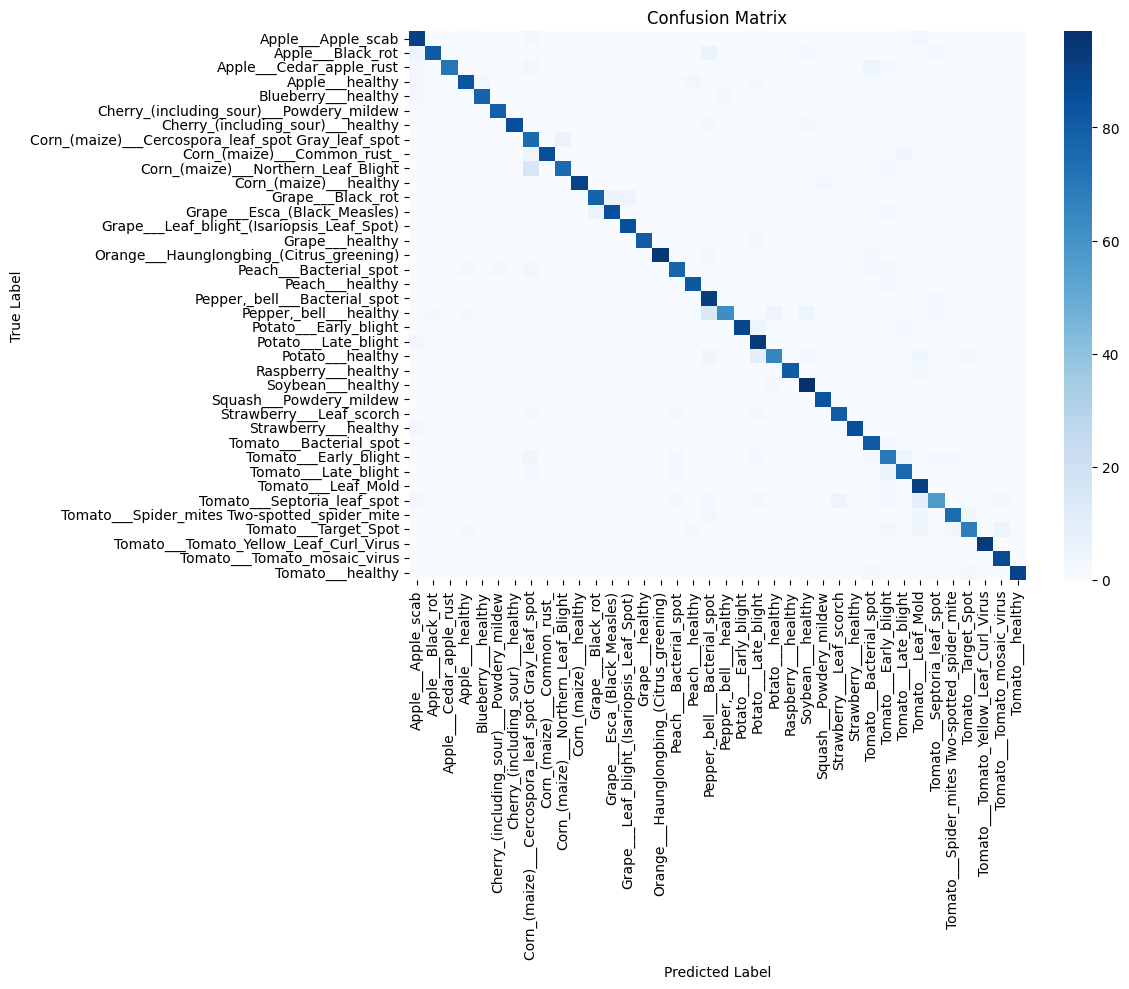


🧪 SSIM & PSNR (first 5 samples):
Sample 1: SSIM = 1.0000, PSNR = inf dB
Sample 2: SSIM = 1.0000, PSNR = inf dB
Sample 3: SSIM = 1.0000, PSNR = inf dB
Sample 4: SSIM = 1.0000, PSNR = inf dB
Sample 5: SSIM = 1.0000, PSNR = inf dB


In [24]:
# Step 5: Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 7: SSIM & PSNR (identity check on a few samples)
print("\n🧪 SSIM & PSNR (first 5 samples):")
for i in range(5):
    img = val_generator[0][0][i]
    ssim_val = ssim(img, img, channel_axis=2, data_range=1.0)
    psnr_val = psnr(img, img, data_range=1.0)
    print(f"Sample {i+1}: SSIM = {ssim_val:.4f}, PSNR = {psnr_val:.2f} dB")

In [20]:
# Step 6: Classification Report
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))


📄 Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.80      0.91      0.85       100
                                 Apple___Black_rot       0.95      0.82      0.88        99
                          Apple___Cedar_apple_rust       0.99      0.81      0.89        88
                                   Apple___healthy       0.86      0.83      0.84       100
                               Blueberry___healthy       0.93      0.87      0.90        90
          Cherry_(including_sour)___Powdery_mildew       0.95      0.94      0.95        84
                 Cherry_(including_sour)___healthy       0.99      0.95      0.97        91
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.66      0.91      0.77        82
                       Corn_(maize)___Common_rust_       0.99      0.91      0.95        95
               Corn_(maize)___Northern_Leaf_Blight   